In [1]:
import numpy as np
import matplotlib.pyplot as plt

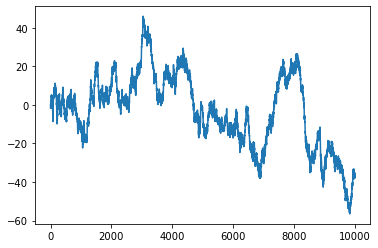

In [2]:
class FBmHoskingMethod:
    def __init__(self, H, Y0 = 0):
        self.H = H
        self.Y0 = Y0

        self.C = [self.gamma(1)]
        c = self.C.copy()
        self.d_sigma2 = [
            (c, 1 - self.dot(c, c))
        ]
    
    def gamma(self, k):
        if k == 0:
            return 1
        result = (k + 1) ** (2 * self.H)
        result += (k - 1) ** (2 * self.H)
        result -= 2 * k ** (2 * self.H)
        return result / 2
    
    @staticmethod
    def dot(a, b):
        return np.dot(a, b).item()
    
    def getc(self, n):
        while(len(self.C) < n+1):
            curr_n = len(self.C)
            self.C.append(self.gamma(curr_n + 1))
        return self.C[:n+1]
    
    def growD_sigma2(self):
        curr_n = len(self.d_sigma2) - 1
        d, sigma2 = self.d_sigma2[-1]
        c = self.getc(curr_n)

        tau = self.dot(d, c[::-1])
        gammaN2 = self.gamma(curr_n + 2)
        phi = (gammaN2 - tau) / sigma2


        newD = [j - phi * i for j, i in zip(d, d[::-1])]
        newD.append(phi)
        newSigma2 = sigma2 - (gammaN2 - tau) ** 2 / sigma2
        self.d_sigma2.append((newD, newSigma2))
    
    def generateXi(self, i, noise):
        d_i, sigma2_i = self.d_sigma2[i]
        mu_i = self.dot(noise, d_i)
        std_i = np.sqrt(sigma2_i)
        sim = np.random.normal(mu_i, std_i)
        noise.append(sim)

    def generate(self, size):
        result = [self.Y0]
        if size <= 1:
            return result

        while(len(self.d_sigma2) < size - 2):
            self.growD_sigma2()

        noise = [np.random.standard_normal()]
        result.append(result[-1] + noise[-1])
        for i in range(size - 2):
            self.generateXi(i, noise)
            result.append(result[-1] + noise[-1])
        
        return result
    
    def getGenerator(self):
        last = self.Y0
        yield last

        noise = [np.random.standard_normal()]
        last += noise[-1]
        yield last

        n = 1
        while True:
            while(len(self.d_sigma2) < n):
                self.growD_sigma2()
            self.generateXi(n-1, noise)

            last += noise[-1]
            n += 1
            yield last

    
    def clear_cache(self):
        self.__init__(self.H, self.values[0])

fBm = FBmHoskingMethod(0.1)
ts = fBm.generate(10000)
plt.plot(ts)
plt.show()

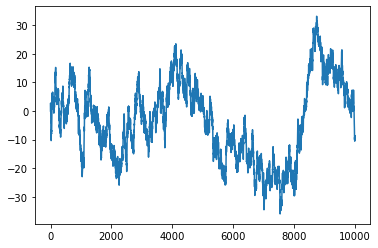

In [3]:
ts = fBm.generate(10000)
plt.plot(ts)
plt.show()

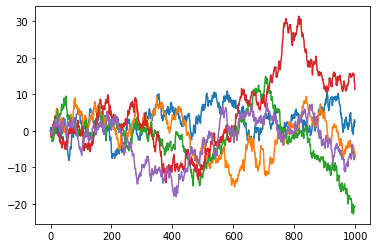

In [7]:
for i in range(5):
    ts = fBm.generate(1000)
    plt.plot(ts)
plt.show()

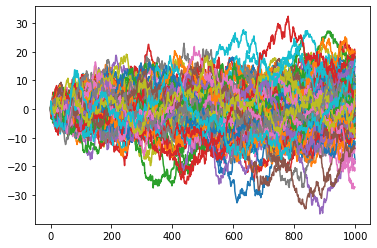

In [8]:
for i in range(100):
    ts = fBm.generate(1000)
    plt.plot(ts)
plt.show()

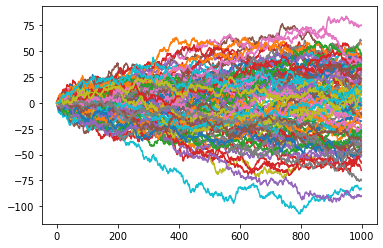

In [15]:
fBm = FBmHoskingMethod(0.5)
for i in range(100):
    ts = fBm.generate(1000)
    plt.plot(ts)
plt.show()

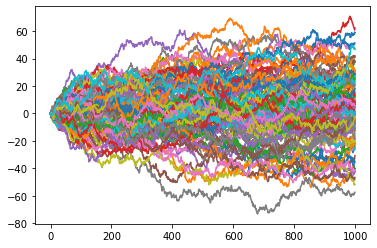

In [16]:
fBm = FBmHoskingMethod(0.25)
for i in range(100):
    ts = fBm.generate(1000)
    plt.plot(ts)
plt.show()

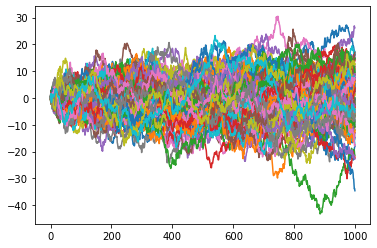

In [17]:
fBm = FBmHoskingMethod(0.1)
for i in range(100):
    ts = fBm.generate(1000)
    plt.plot(ts)
plt.show()

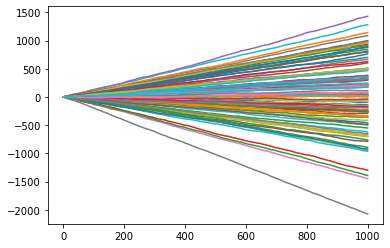

In [18]:
fBm = FBmHoskingMethod(0.75)
for i in range(100):
    ts = fBm.generate(1000)
    plt.plot(ts)
plt.show()